# Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
import io
import pandas as pd
train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory Data Analysis

In [ ]:
train.shape

(4250, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Cek Missing Value
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
#Membagi dataset atas categorical dan numerical
categorical = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numerical = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def bar_percent(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

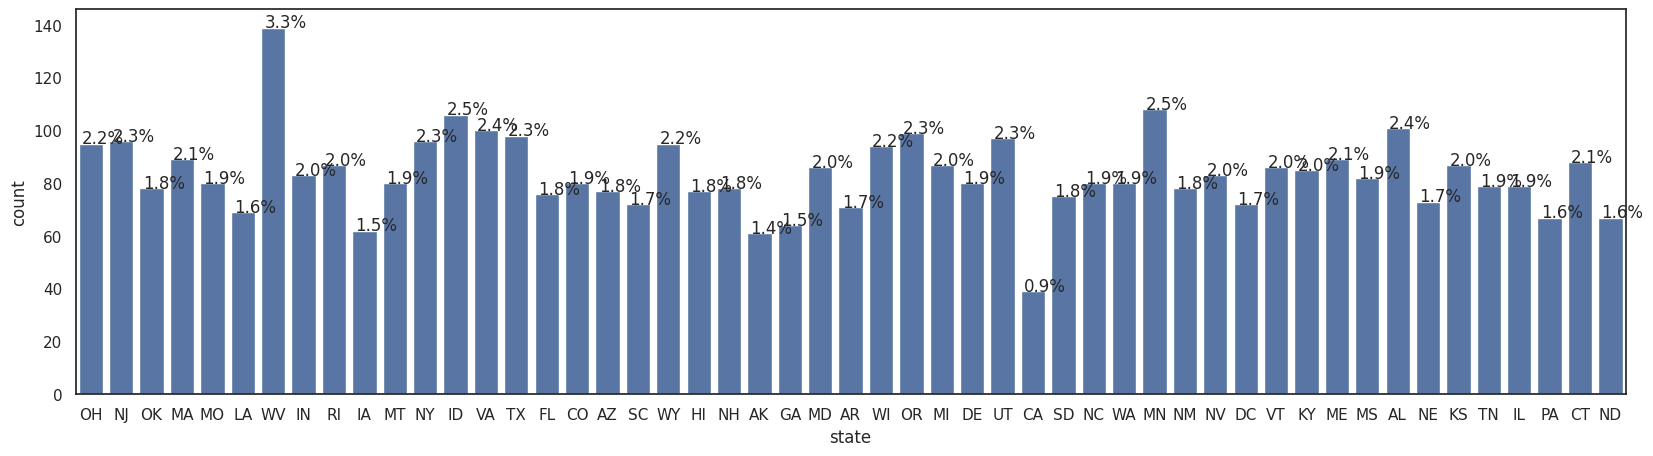

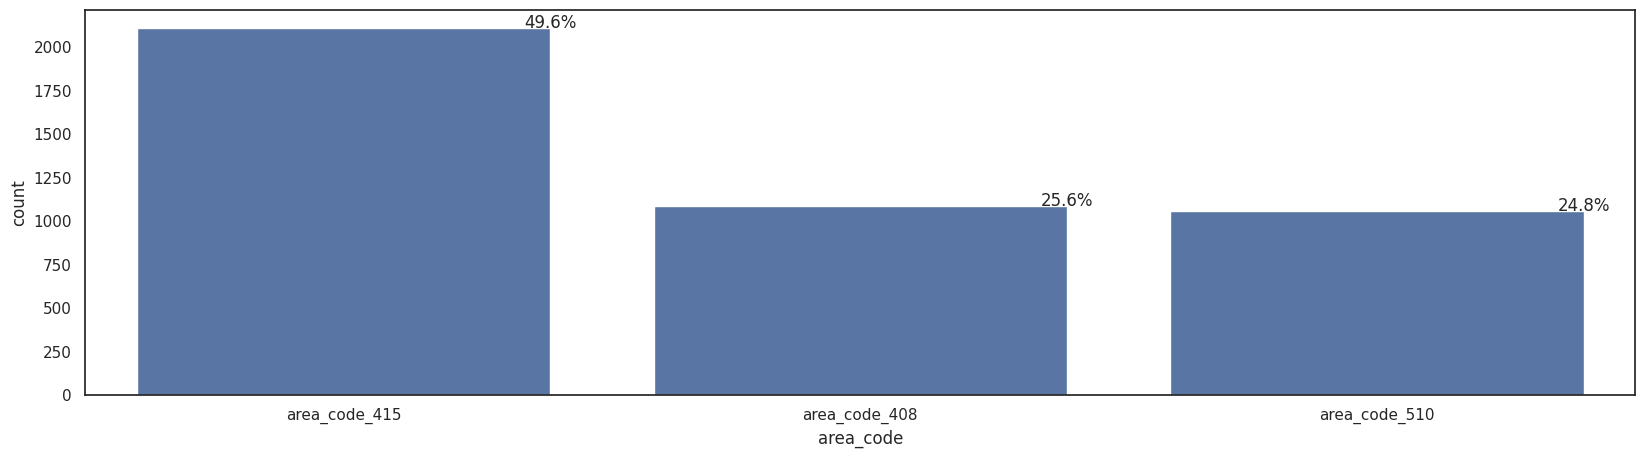

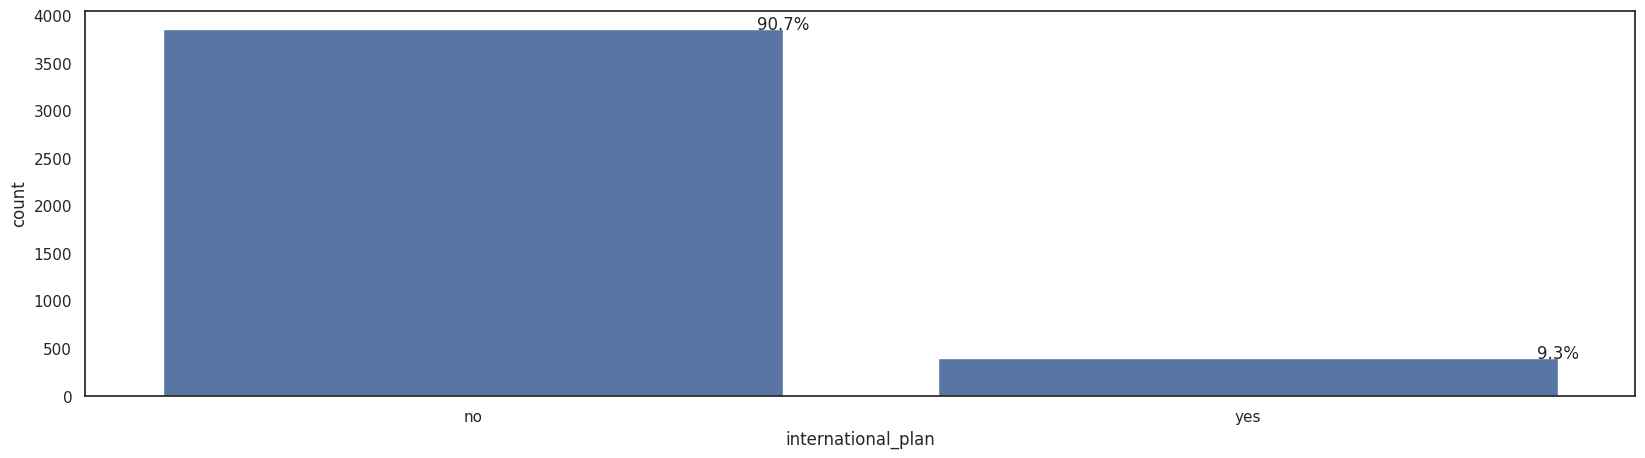

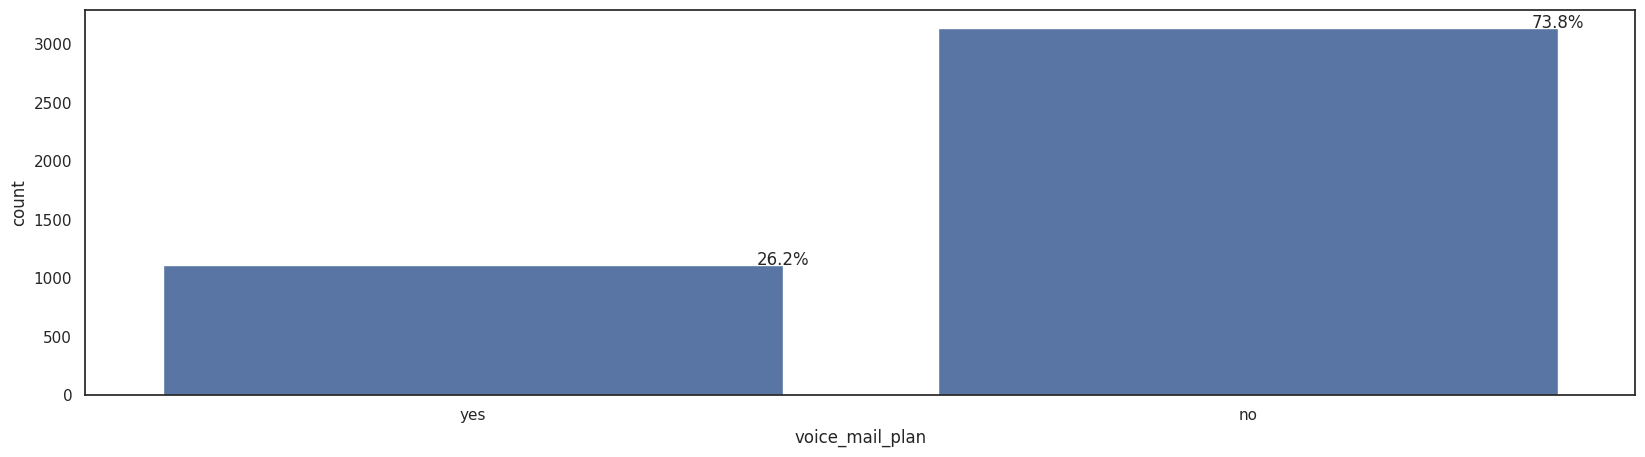

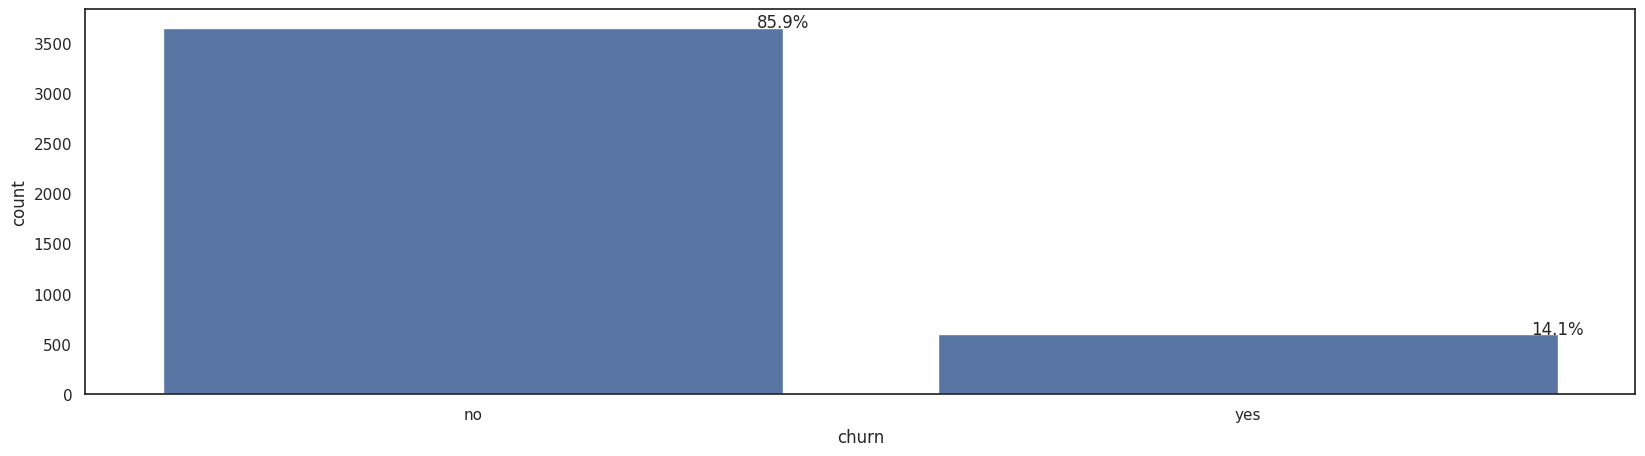

In [ ]:
#bar plot variabel categorigal
for feature in categorical:
    sns.set(style = 'white')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    #plt.title(feature)
    bar_percent(total, ax)
    plt.show()

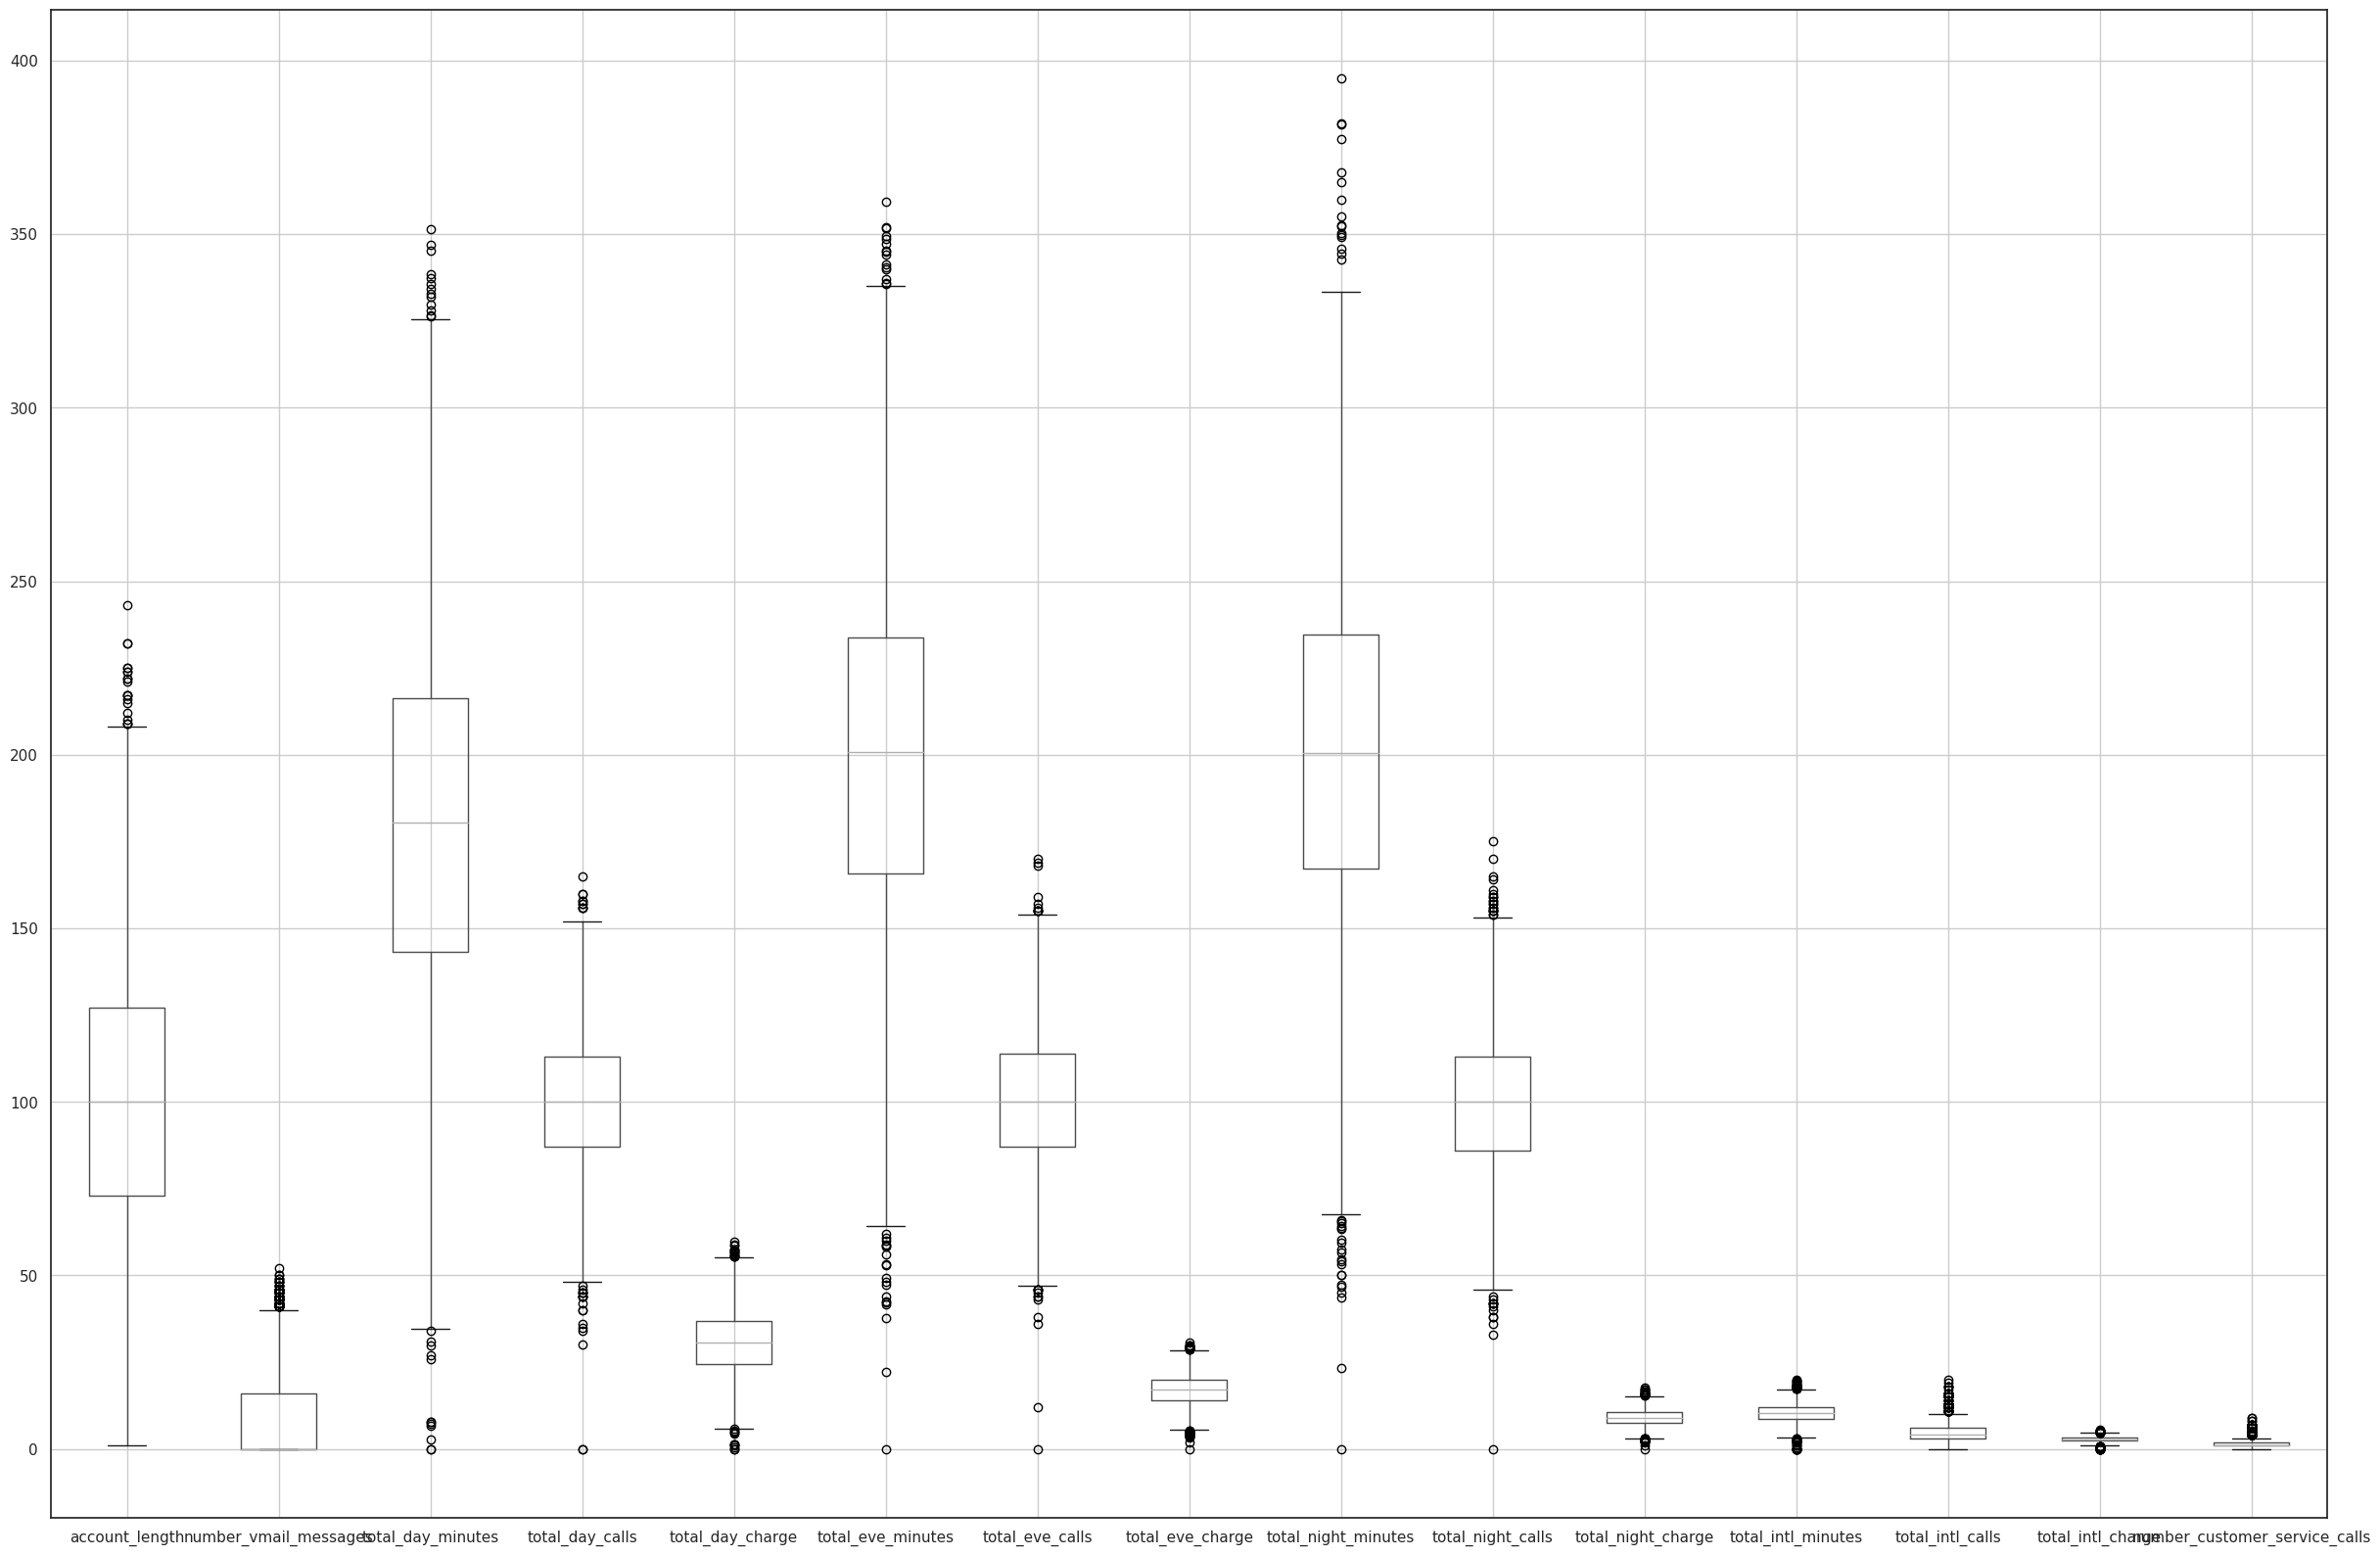

In [ ]:
#cek outlier
plt.figure(figsize=(30,20))
train.boxplot()
plt.show()

In [ ]:
#Menghapus Outliers
import numpy as np
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in numerical :
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries

train = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


<ipython-input-13-109fe68dafb0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train.corr()


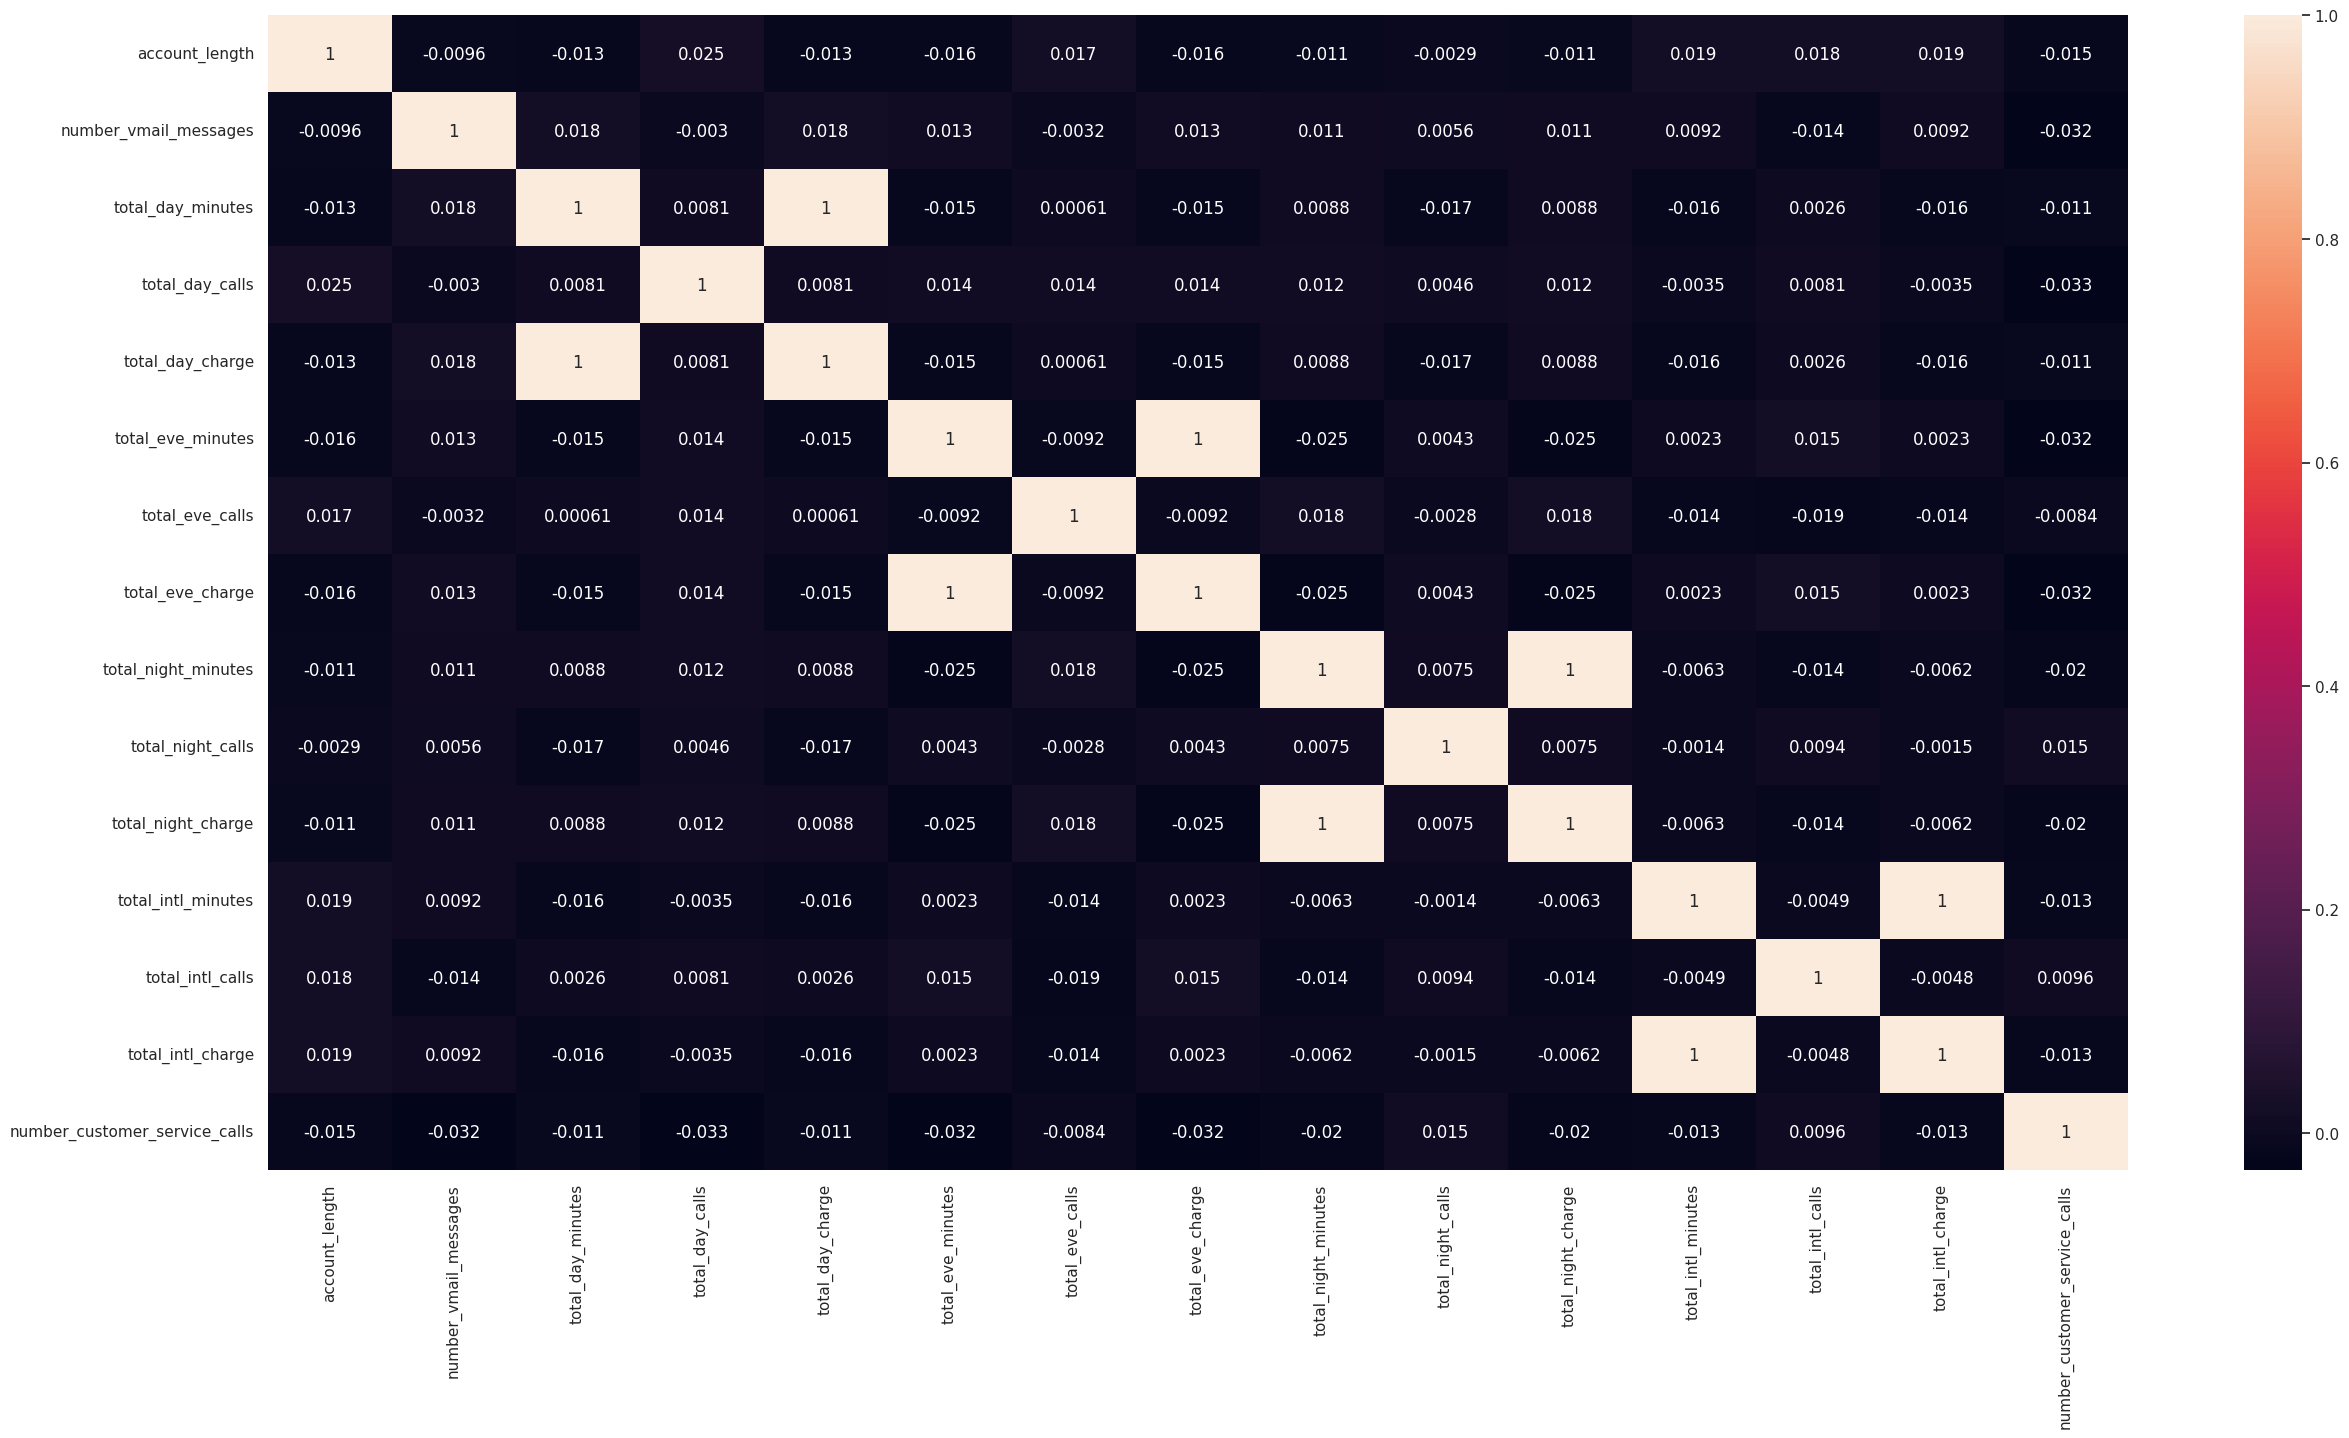

In [ ]:
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#Menghapus kolom
train.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan'], axis=1, inplace=True)
train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
7,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [ ]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'churn'.
train['churn']= label_encoder.fit_transform(train['churn'])
train['churn'].unique()
train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,140,0,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,7.5,6,2.03,1,1
4245,83,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0


In [ ]:
#Drop target variable
x = train.drop(['churn'], 1)
y = train['churn']
train.head()

<ipython-input-16-5d35786f2651>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = train.drop(['churn'], 1)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
#Filter Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=4)
chi2_selector.fit(x, y)

cols = chi2_selector.get_support(indices=True)
train_selected_features = x.iloc[:,cols]
train_selected_features

,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes
0,26,161.6,27.47,195.5
1,0,243.4,41.38,121.2
3,0,166.7,28.34,148.3
5,0,157.0,26.69,103.1
7,37,258.6,43.96,222.0
...,...,...,...,...
4243,0,244.7,41.60,258.6
4245,0,188.3,32.01,243.8
4246,0,177.9,30.24,131.2
4247,0,170.7,29.02,193.1


# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_transform = scaler.fit_transform(x)

In [ ]:
x_transform = pd.DataFrame(x_transform,columns = x.columns)

In [ ]:
x_transform

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.522167,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,0.702408,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333
1,0.669951,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,0.357035,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000
2,0.364532,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,0.448457,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000
3,0.719212,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,0.542137,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000
4,0.689655,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,0.973288,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,0.684729,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,0.615500,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333
3511,0.403941,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,0.549285,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000
3512,0.354680,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,0.445824,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000
3513,0.364532,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,0.231001,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333


In [ ]:
#Train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.3, random_state = 123)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
evaluasi_model(dtc, x_test, y_test)

0.8729857819905213

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.933649289099526

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(x_test, y_test)

0.9488151658767773

# Prediksi Customer Churn

In [ ]:
uploaded1 = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded1['Data Test.csv']))
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
#Mengecek missing value
test.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
#Menghapus kolom state, area_code, international_plan, voice_mail_plan
test.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan'], axis=1, inplace=True)
test

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
#Menginisialisasi id dan menghapus kolom id dari data test
id = test.id
test = test.drop('id', axis=1)

In [ ]:
y_prediction = rf.predict(test)
prediction = pd.DataFrame({'id': id, 'churn': y_prediction})
print(prediction)

      id  churn
0      1      0
1      2      1
2      3      1
3      4      1
4      5      1
..   ...    ...
745  746      1
746  747      1
747  748      1
748  749      1
749  750      1

[750 rows x 2 columns]


In [ ]:
prediction.churn.replace([0, 1],['no', 'yes'], inplace = True)
print(prediction)

      id churn
0      1    no
1      2   yes
2      3   yes
3      4   yes
4      5   yes
..   ...   ...
745  746   yes
746  747   yes
747  748   yes
748  749   yes
749  750   yes

[750 rows x 2 columns]
